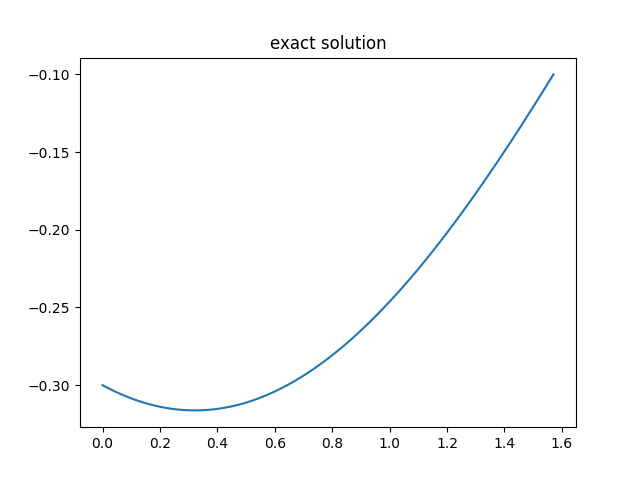

<ipython-input-47-ed7bf84e921d>:49: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('exact solution','approx')
<ipython-input-47-ed7bf84e921d>:49: UserWarning: Legend does not support 'x' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('exact solution','approx')
<ipython-input-47-ed7bf84e921d>:49: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('exact solution','approx')
<ipython-input-47-ed7bf84e921d>:49: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http

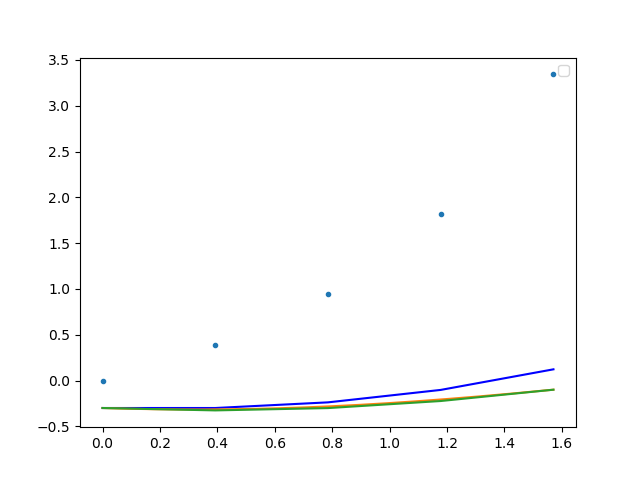

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
def exact(xvec):
    return ((-1/10)*(np.sin(xvec) + 3*np.cos(xvec)))

def second_order_fe(x_start, x_end, dx, y_init, f):
    x=x_start
    y=y_init
    xlist = [x]
    ylist =[y]
    while not np.isclose(x,x_end):
        y_new = y+dx*f(x,y)
        y=y_new
        x=x+dx
        xlist.append(x)
        ylist.append(y)
    return (xlist, ylist)
#soln for first ivp
def f1(x,y):
    return np.array([y[1], y[1]+2*y[0]+np.cos(x)])
#soln for second ivp
def f2(x,y):
    return np.array([y[1], y[1]+2*y[0]])

x_exact = np.linspace(0,m.pi/2,1000)
y_exact = exact(x_exact)
plt.plot(x_exact,y_exact)
plt.title('exact solution')
plt.show()
          
#dx=m.pi/16
dx=m.pi/8

(x1,y1) = second_order_fe(0.0,m.pi/2,dx,np.array([-0.3,0]),f1)
soln1 = np.array(y1)
plt.plot(x1,soln1[:,0],'b')

(x2,y2) = second_order_fe(0.0,m.pi/2,dx,np.array([0,1]),f2)
soln2 = np.array(y2)
plt.plot(x2,soln2[:,0],'.')

c= (-0.1-soln1[-1,0])/soln2[-1,0]

soln = soln1 + c*soln2

plt.plot(x_exact,y_exact)
plt.plot(x1,soln[:,0],'-')
plt.legend('exact solution','approx')
plt.show()

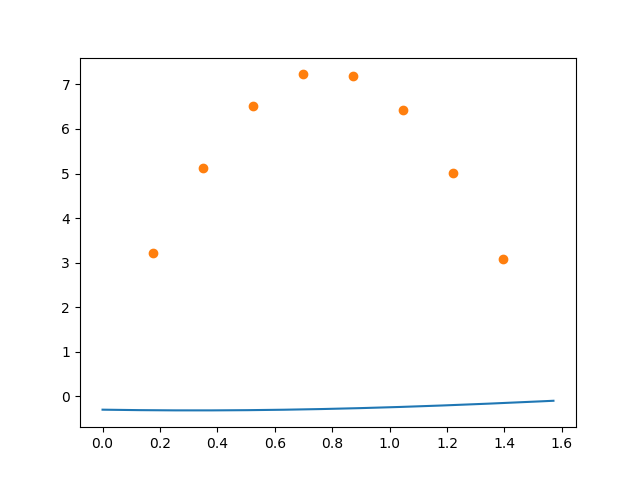

error:16.825218723893098


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

def exact(xvec):
    return ((-1/10)*(np.sin(xvec) + 3*np.cos(xvec)))
a=0
b=np.pi/2
#n= 4
n=8

xpts = np.linspace(a,b,n+2)
h = (b-a)/(n+1)

A = np.zeros((n,n))
for i in range(n):
    A[i,i]= 2 + h*h*2
for i in range(1,n):
    A[i,i-1] = -1-(h/2)
for i in range(n-1):
    A[i,i+1] = -1-(h/2)

    

rhs = np.zeros(n)
rhs[0:-1] = -h*h*np.cos(xpts[i])+(1+(h/2))
rhs[1:-1] = -h*h*np.cos(xpts[i])
rhs[-1] = -h*h*np.cos(xpts[i])+(1-(h/2))

y_hat = np.linalg.solve(A,rhs)

x_exact = np.linspace(a,b,1000)
plt.plot(x_exact, exact(x_exact))
plt.plot(xpts[1:-1], y_hat, 'o')
plt.show()

y_exact = exact(xpts[1:-1])
err = np.linalg.norm(y_exact - y_hat)
print('error:{}'.format(err))